In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore")

### 1. EDA

In [77]:
data = pd.read_csv('data/combined_data_subset.csv')

In [78]:
data

,Key,Subject_ID,Month,Diagnosis,Sex,Age,APOE,MMSE,PC1,PC2,...,xu.S6OENiSSCDruXFc,xu3n8ix_RpCpNPRKhc,xuBm5ckgidWRNTl.gQ,xuNOUeR1JerhIuIV7c,xud4v2r3nXECBua55o,xvHfVEL1fC35XJ7neU,xve7nuGHtAizelOmhE,xvrrv4q_nIDgJej.uU,xws9e3UChad1OnXmXY,xz1S1tKD.sgqfTuesU
0,KPOADC001_0,KPOADC001,0,0,0,86,0,0.583333,-0.0824,-0.0177,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0.788559
1,KPOADC001_3,KPOADC001,3,0,0,86,0,0.416667,-0.0824,-0.0177,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0.788559
2,KPOADC001_12,KPOADC001,12,0,0,86,0,0.625000,-0.0824,-0.0177,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0.788559
3,KPOADC002_0,KPOADC002,0,0,0,68,0,0.833333,-0.0858,-0.0128,...,0.700966,0.777064,0.680335,0.828906,0.895631,0.929776,0.780032,0.607193,0.826743,0.833734
4,KPOADC002_3,KPOADC002,3,0,0,68,0,0.791667,-0.0858,-0.0128,...,0.700966,0.777064,0.680335,0.828906,0.895631,0.929776,0.780032,0.607193,0.826743,0.833734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,THSMCI064_0,THSMCI064,0,2,1,80,2,0.916667,0.0135,-0.0574,...,0.628193,0.935638,0.576219,0.826243,0.851986,0.936146,0.710167,0.549367,0.751225,0.653483
610,THSMCI064_6,THSMCI064,6,2,0,80,1,0.796355,0.0135,-0.0574,...,0.628193,0.935638,0.576219,0.826243,0.851986,0.936146,0.710167,0.549367,0.751225,0.653483
611,THSMCI065_0,THSMCI065,0,2,1,76,1,0.958333,0.0011,-0.0498,...,0.623643,0.912389,0.741199,0.843128,0.824156,0.778257,0.709999,0.510799,0.848757,0.750686
612,THSMCI065_6,THSMCI065,6,2,0,77,1,0.796355,0.0011,-0.0498,...,0.623643,0.912389,0.741199,0.843128,0.824156,0.778257,0.709999,0.510799,0.848757,0.750686


#### Count Plots for Diagnosis and Gender

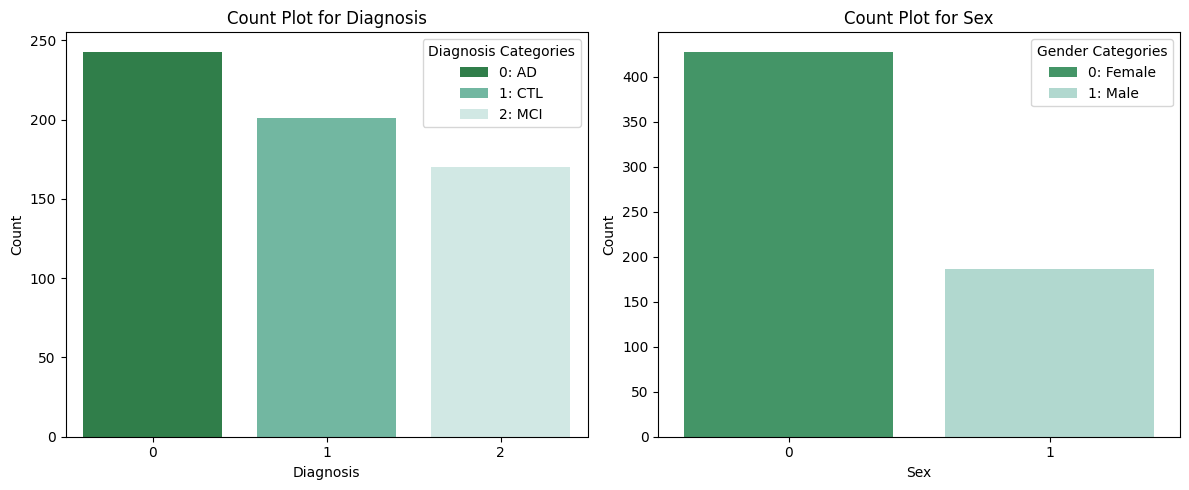

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for 'Diagnosis' with legend
diagnosis_plot = sns.countplot(x='Diagnosis', data=data, palette="BuGn_r", ax=axes[0])
diagnosis_plot.set_title('Count Plot for Diagnosis')
diagnosis_plot.set_xlabel('Diagnosis')
diagnosis_plot.set_ylabel('Count')
# Manually defining legend labels for 'Diagnosis' categories
diagnosis_labels = ['0: AD', '1: CTL', '2: MCI']
diagnosis_legend = axes[0].legend(title='Diagnosis Categories', loc='upper right', labels=diagnosis_labels)

# Count plot for 'Sex' with legend
sex_plot = sns.countplot(x='Sex', data=data, palette="BuGn_r", ax=axes[1])
sex_plot.set_title('Count Plot for Sex')
sex_plot.set_xlabel('Sex')
sex_plot.set_ylabel('Count')
# Manually defining legend labels for 'Sex' categories, assuming 0 and 1 correspond to different genders
sex_labels = ['0: Female', '1: Male']
sex_legend = axes[1].legend(title='Gender Categories', loc='upper right', labels=sex_labels)

plt.tight_layout()
plt.show()


Count Plot for Diagnosis: This plot illustrates the distribution of different diagnosis categories across the dataset. Each bar represents the count of observations for each diagnosis category.



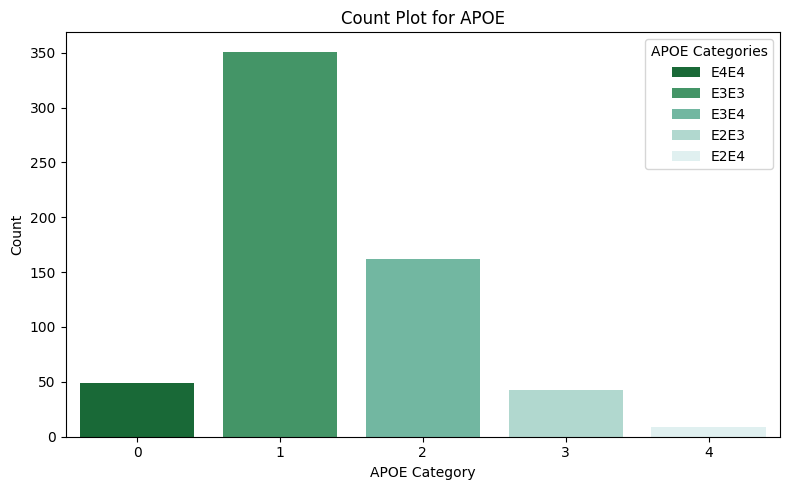

In [80]:
# Adjusting figure size for a single plot
plt.figure(figsize=(8, 5))

# Count plot for 'APOE'
apoe_plot = sns.countplot(x='APOE', data=data, palette="BuGn_r")
apoe_plot.set_title('Count Plot for APOE')
apoe_plot.set_xlabel('APOE Category')
apoe_plot.set_ylabel('Count')
# Assuming 'APOE' categories are numeric starting from 0, generating labels based on unique values
apoe_categories = data['APOE'].unique()
apoe_labels = ['E4E4', 'E3E3', 'E3E4', 'E2E3', 'E2E4']
apoe_legend = apoe_plot.legend(title='APOE Categories', loc='upper right', labels=apoe_labels)

plt.tight_layout()
plt.show()


#### Histogram for Age and MMSE

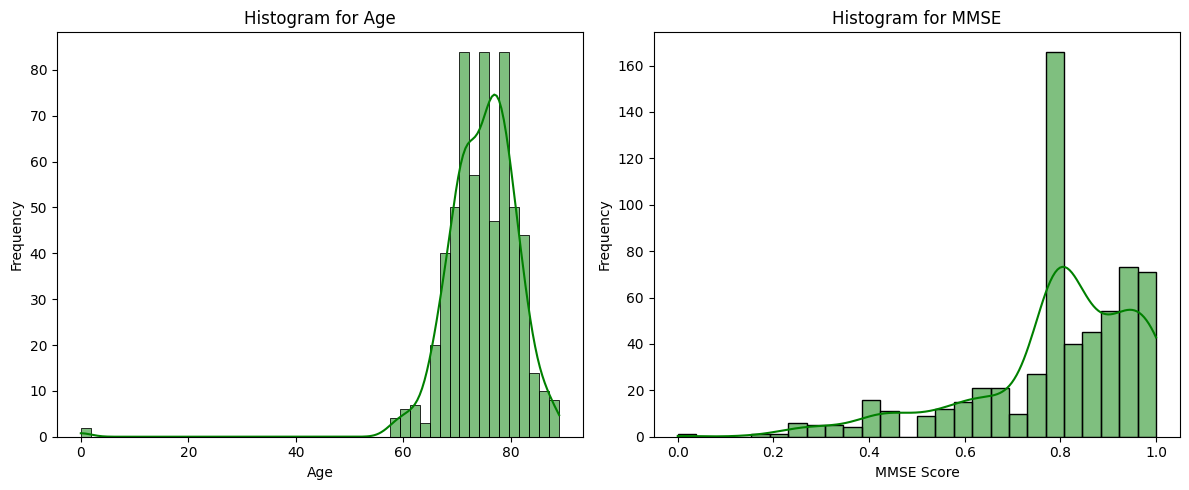

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for 'Age'
sns.histplot(data=data, x='Age', kde=True, color="green", ax=axes[0])
axes[0].set_title('Histogram for Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for 'MMSE'
sns.histplot(data=data, x='MMSE', kde=True, color="green", ax=axes[1])
axes[1].set_title('Histogram for MMSE')
axes[1].set_xlabel('MMSE Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Histogram for Age: This plot shows the distribution of ages within the dataset. The shape of the distribution is roughly normal, indicating a range of ages among the subjects.

Histogram for MMSE: The plot for MMSE scores shows the distribution of cognitive scores among the subjects. The distribution seems to be multimodal, indicating the presence of various subgroups within the dataset.

#### Distribution Analysis

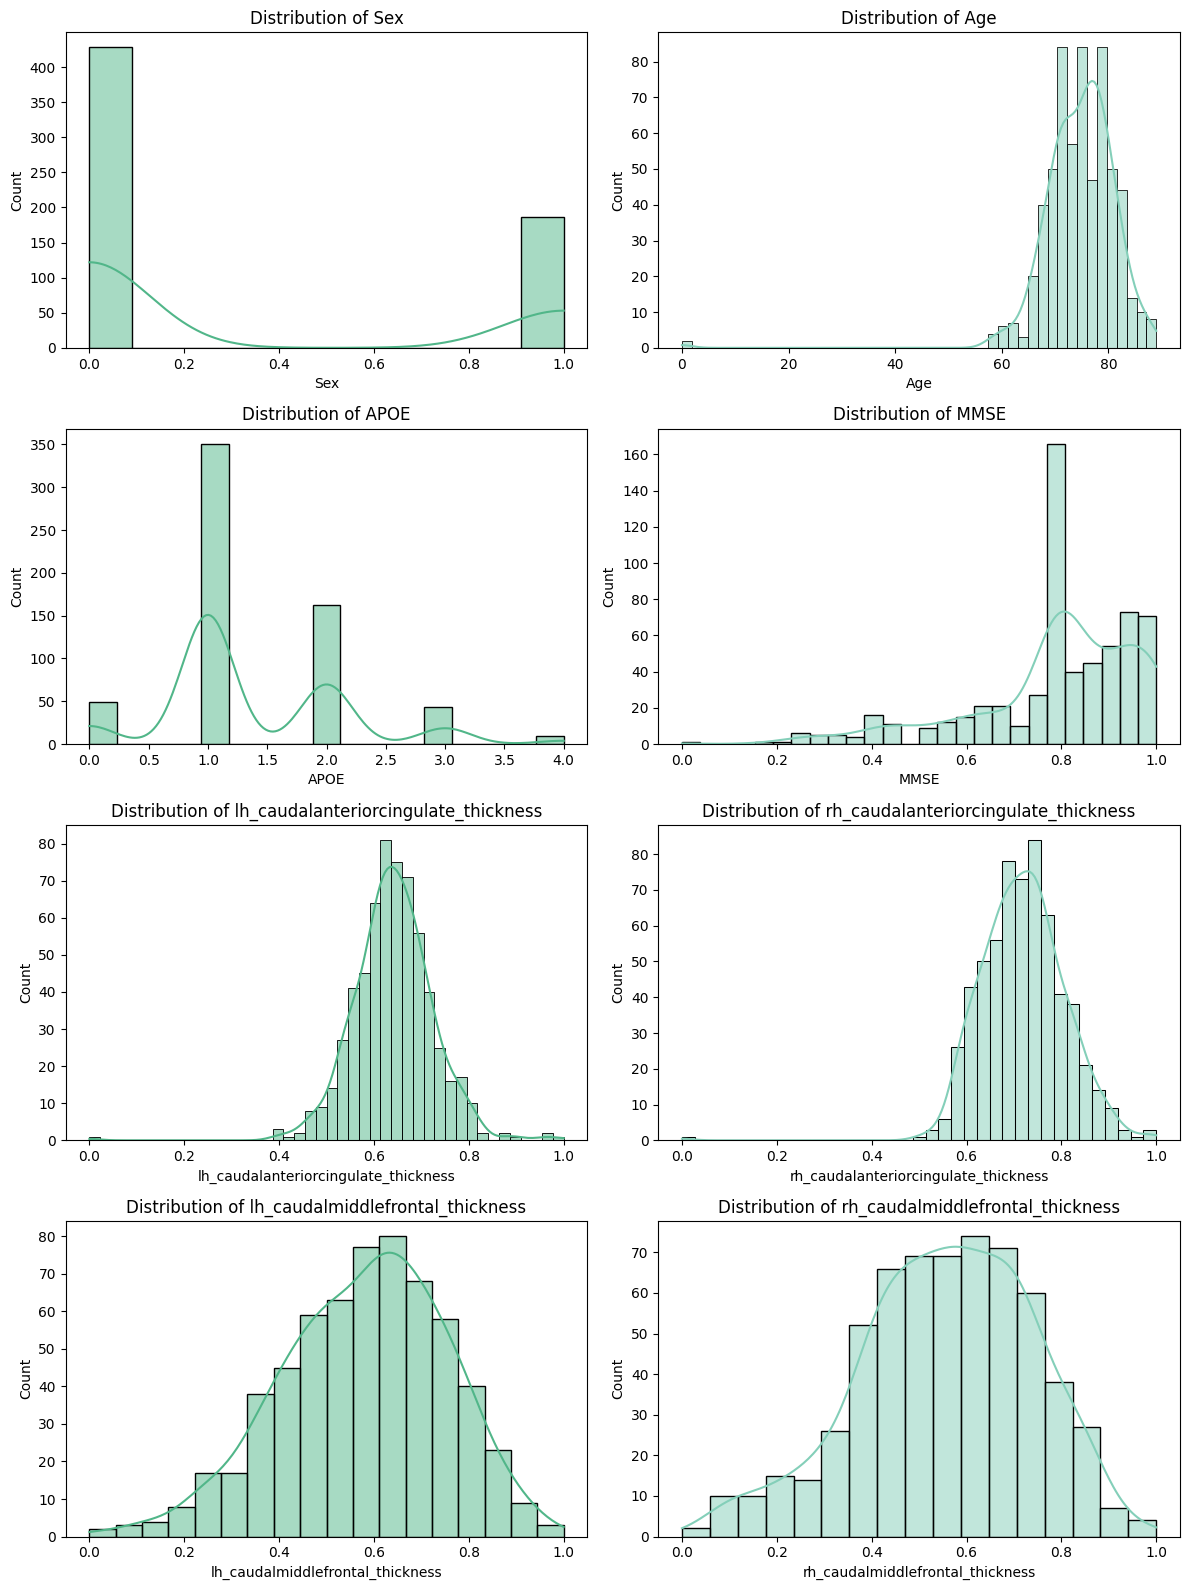

In [99]:
# Adjusting the analysis to ensure we're dealing with numeric columns for histograms and boxplots
extended_subset_columns = ['Diagnosis', 'Sex', 'Age', 'APOE', 'MMSE'] + list(data.columns[20:50])  # Selecting a broader range of columns
extended_data_subset = data[extended_subset_columns]
color_palette = "BuGn_r"

# Re-checking the data types to ensure we select numeric columns
numeric_columns = extended_data_subset.select_dtypes(include=[np.number]).columns.tolist()

# Updating the figure to plot only numeric data
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Histogram and boxplot for a numeric feature
for i, col in enumerate(numeric_columns[1:9]):  # Skipping 'Diagnosis' which is at index 0
    row, col_num = divmod(i, 2)
    sns.histplot(data=extended_data_subset, x=col, kde=True, color=sns.color_palette(color_palette)[col_num + 2], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


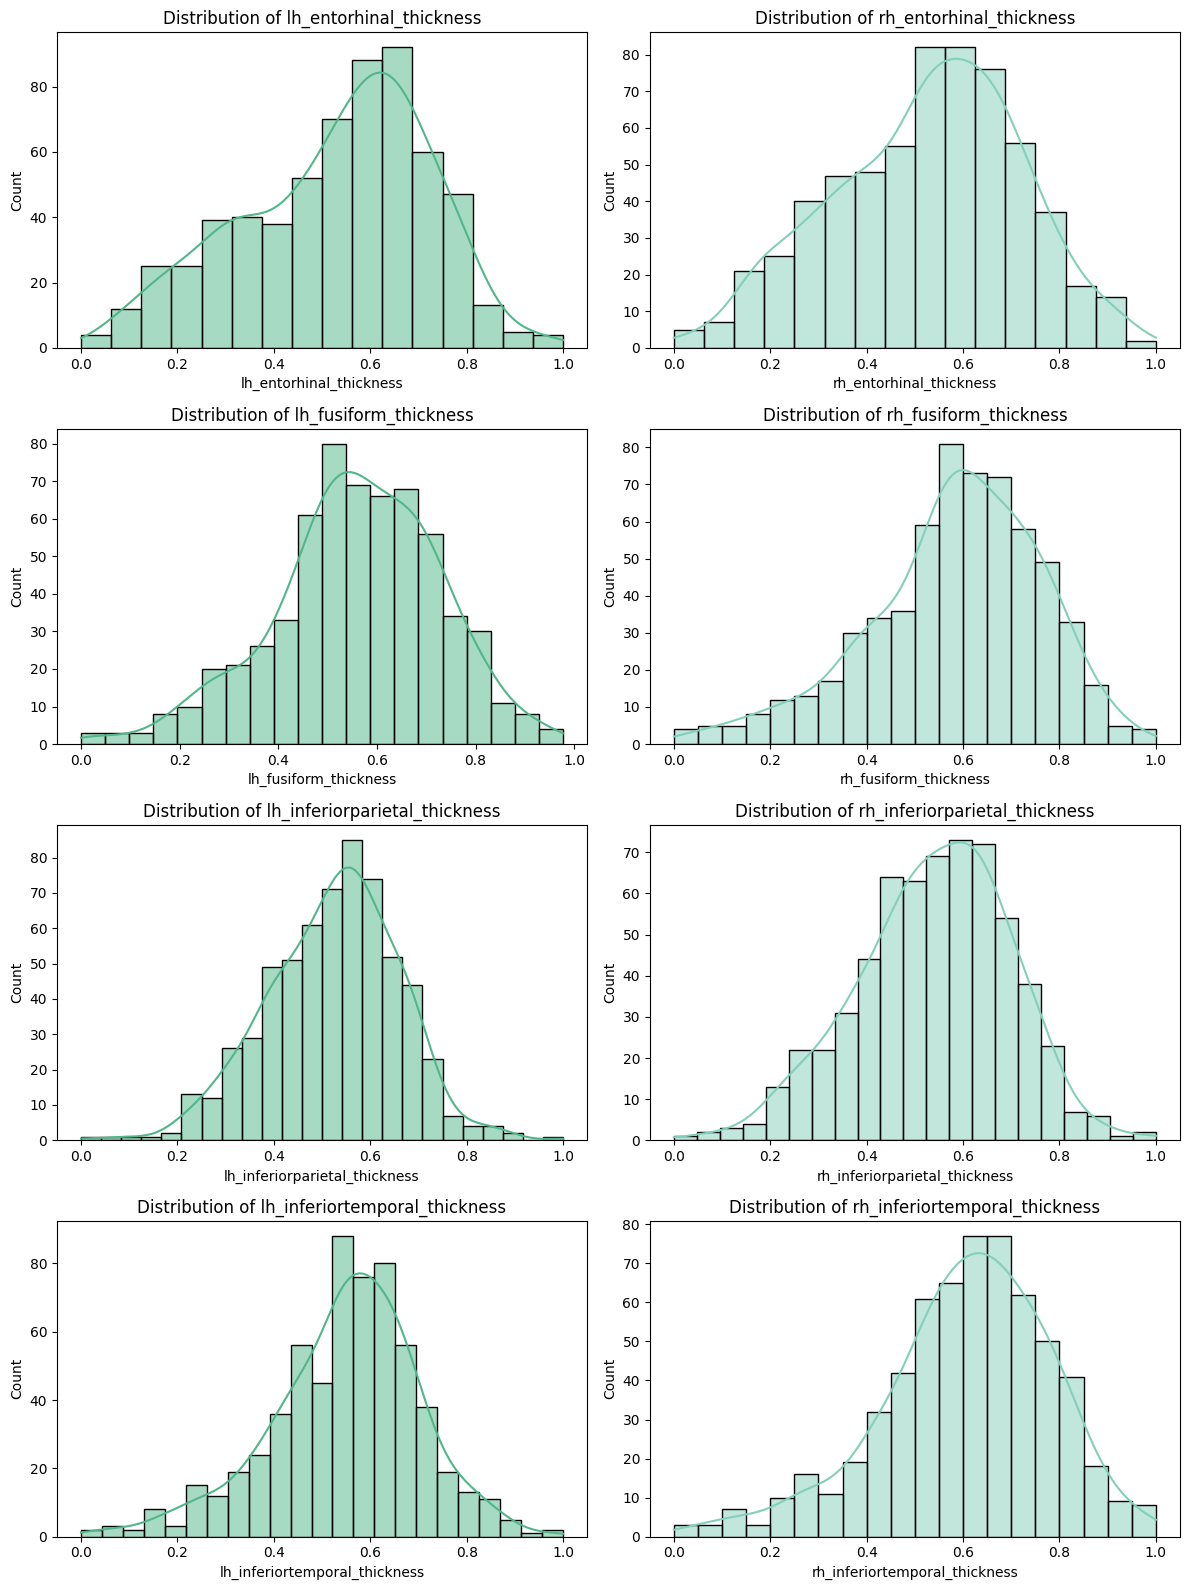

In [100]:
# Updating the figure to plot only numeric data
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Histogram and boxplot for a numeric feature
for i, col in enumerate(numeric_columns[11:19]):  # Skipping 'Diagnosis' which is at index 0
    row, col_num = divmod(i, 2)
    sns.histplot(data=extended_data_subset, x=col, kde=True, color=sns.color_palette(color_palette)[col_num + 2], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Analysis of Left Hemishpere Features

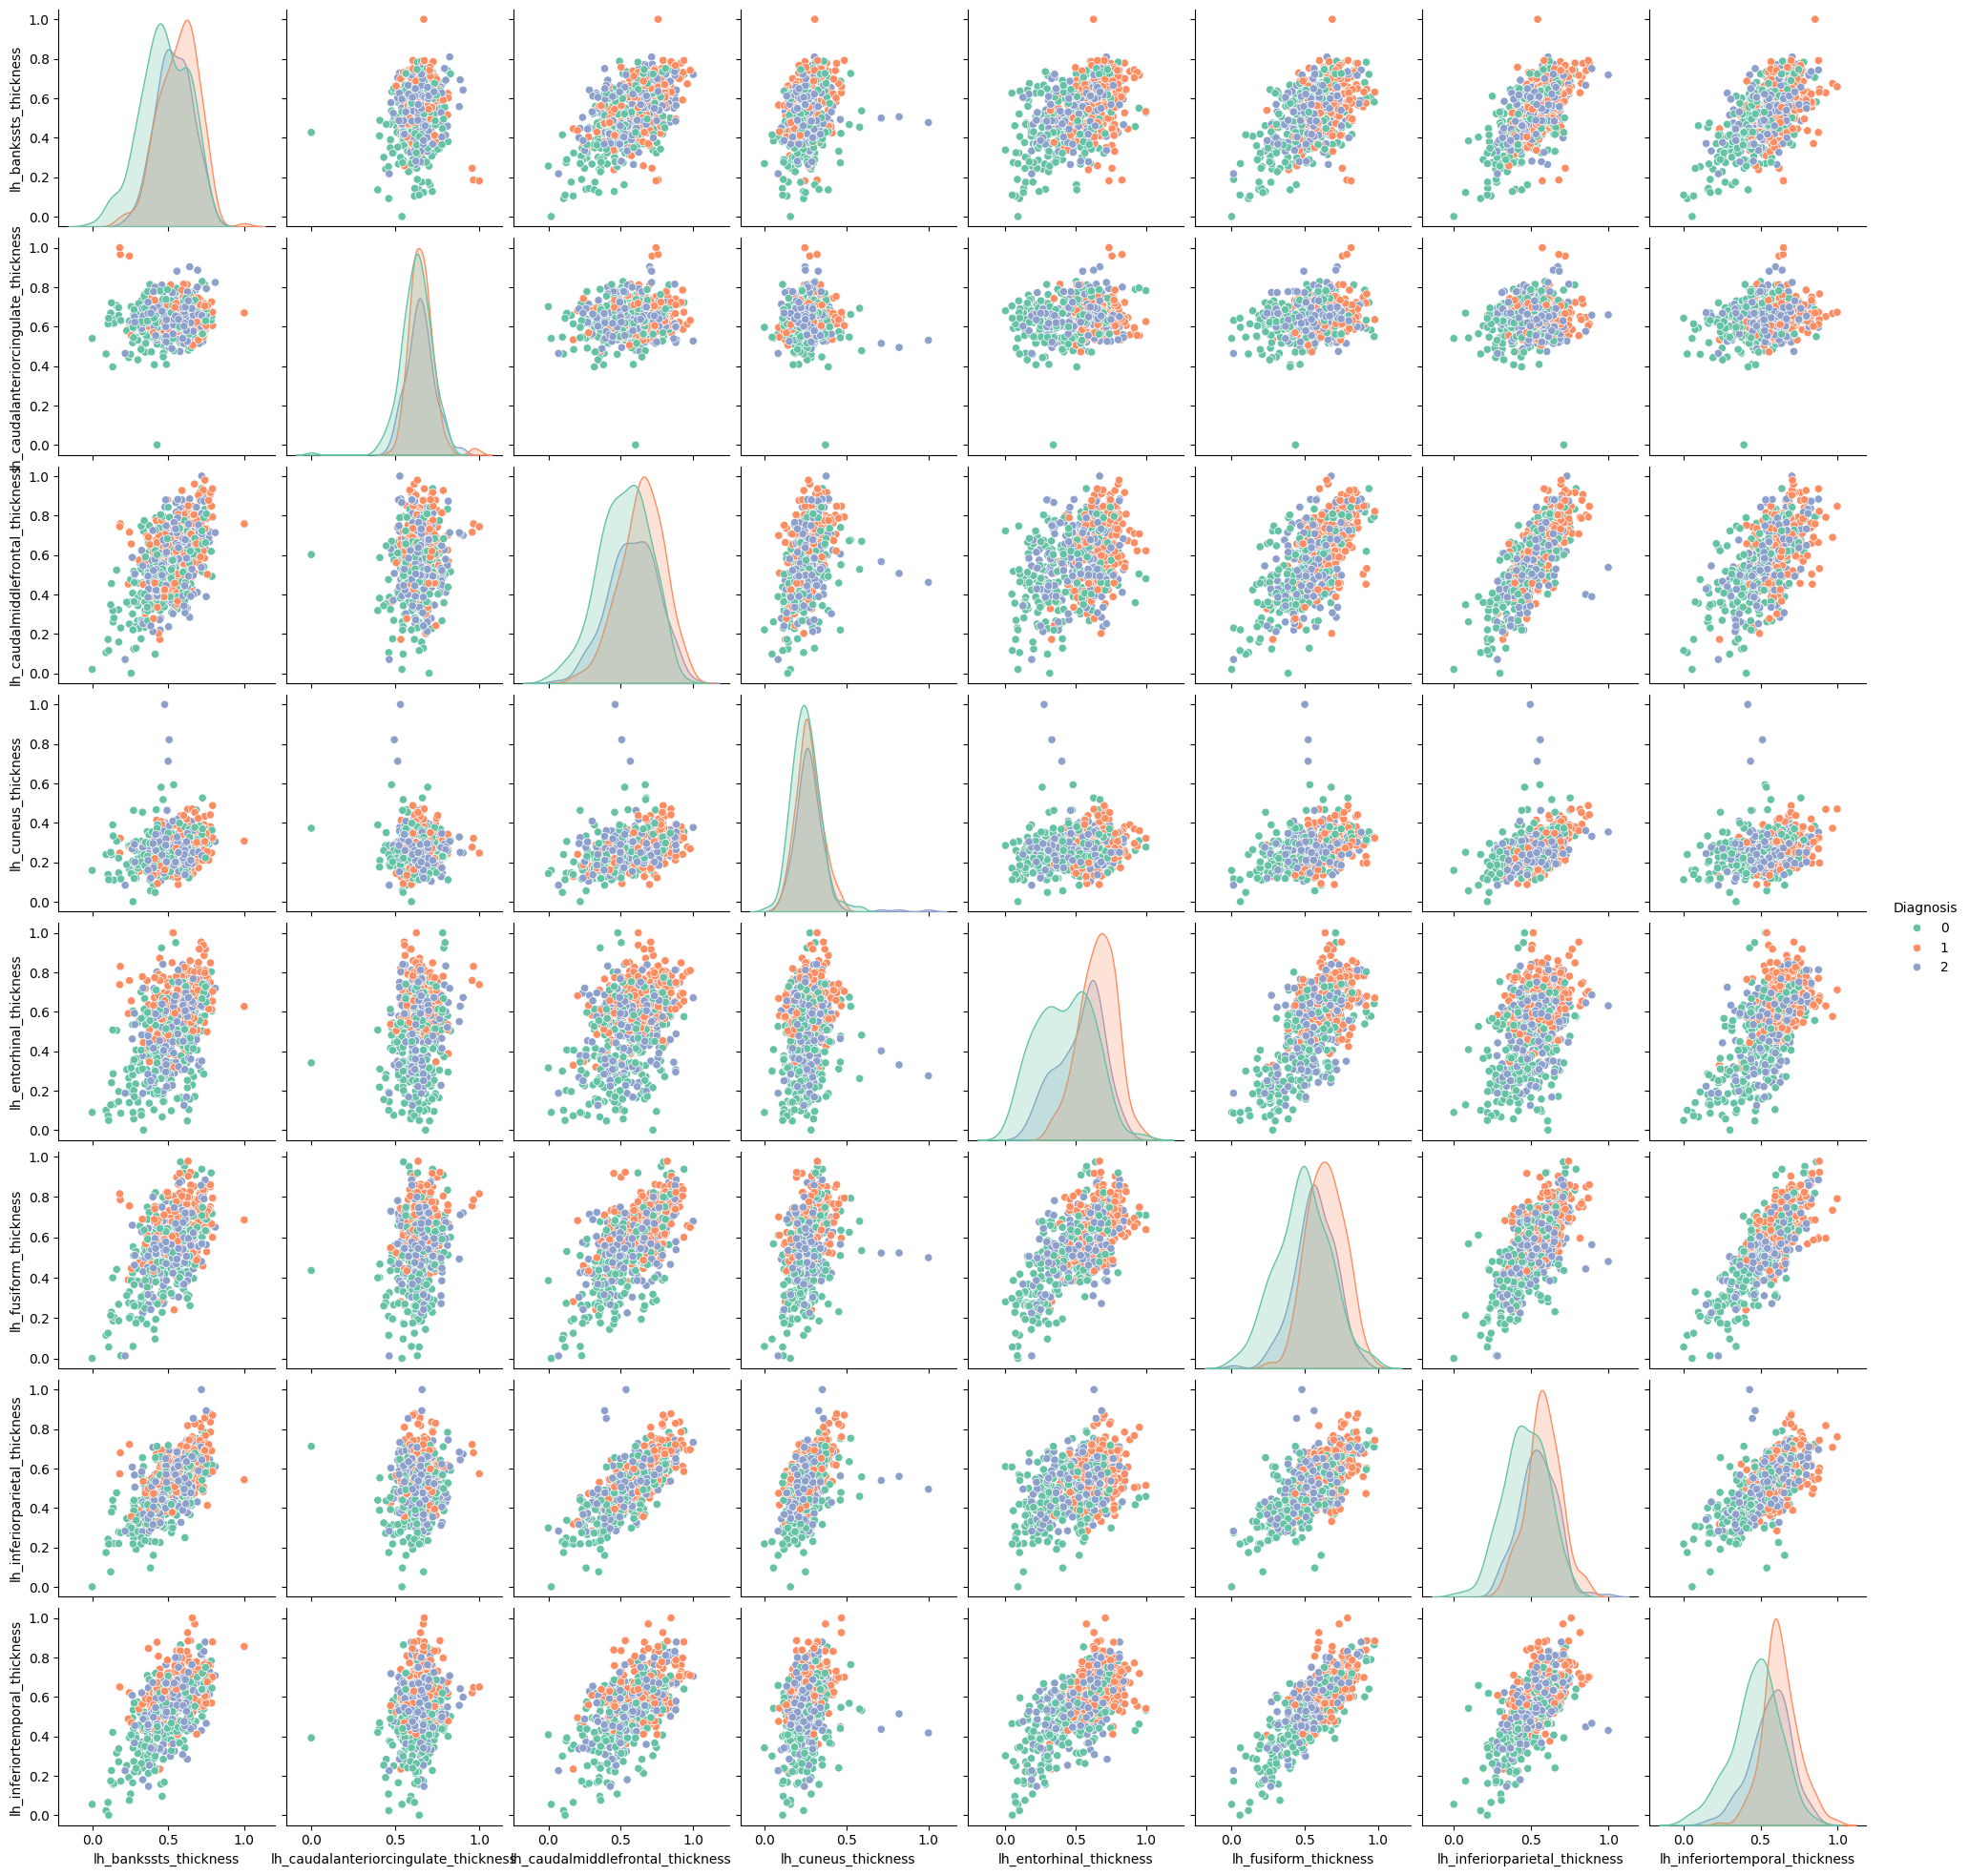

In [84]:
# Selecting features that start with 'lh_' for pair plots, along with 'Diagnosis'
lh_columns = [col for col in data.columns if col.startswith('lh_')]
pair_plot_data = data[['Diagnosis'] + lh_columns]

# Due to the large number of 'lh_' features, plotting all of them in a pair plot may not be feasible.
# For demonstration, let's select the first 5 'lh_' features to keep the pair plot readable.
pair_plot_data = pair_plot_data[['Diagnosis'] + lh_columns[:8]]

# Creating pair plots
sns.pairplot(pair_plot_data, hue='Diagnosis', palette='Set2')
plt.show()


#### Swarm Plots for Geneotype

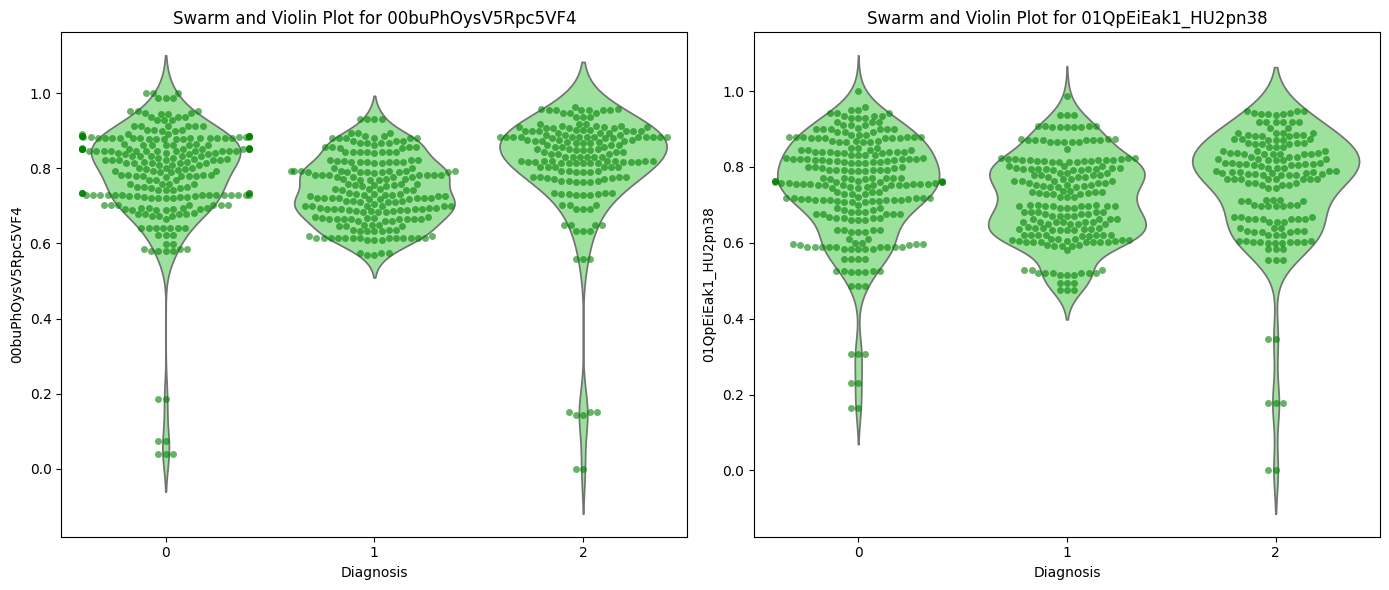

In [85]:
pc_columns = ['Diagnosis', '00buPhOysV5Rpc5VF4', '01QpEiEak1_HU2pn38']

# Creating Swarm and Violin plots for PC1 and PC2 against Diagnosis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.swarmplot(x='Diagnosis', y='00buPhOysV5Rpc5VF4', data=data[pc_columns], ax=axes[0], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='00buPhOysV5Rpc5VF4', data=data[pc_columns], ax=axes[0], inner=None, color='lightgreen')

sns.swarmplot(x='Diagnosis', y='01QpEiEak1_HU2pn38', data=data[pc_columns], ax=axes[1], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='01QpEiEak1_HU2pn38', data=data[pc_columns], ax=axes[1], inner=None, color='lightgreen')

axes[0].set_title('Swarm and Violin Plot for 00buPhOysV5Rpc5VF4')
axes[1].set_title('Swarm and Violin Plot for 01QpEiEak1_HU2pn38')

plt.tight_layout()
plt.show()

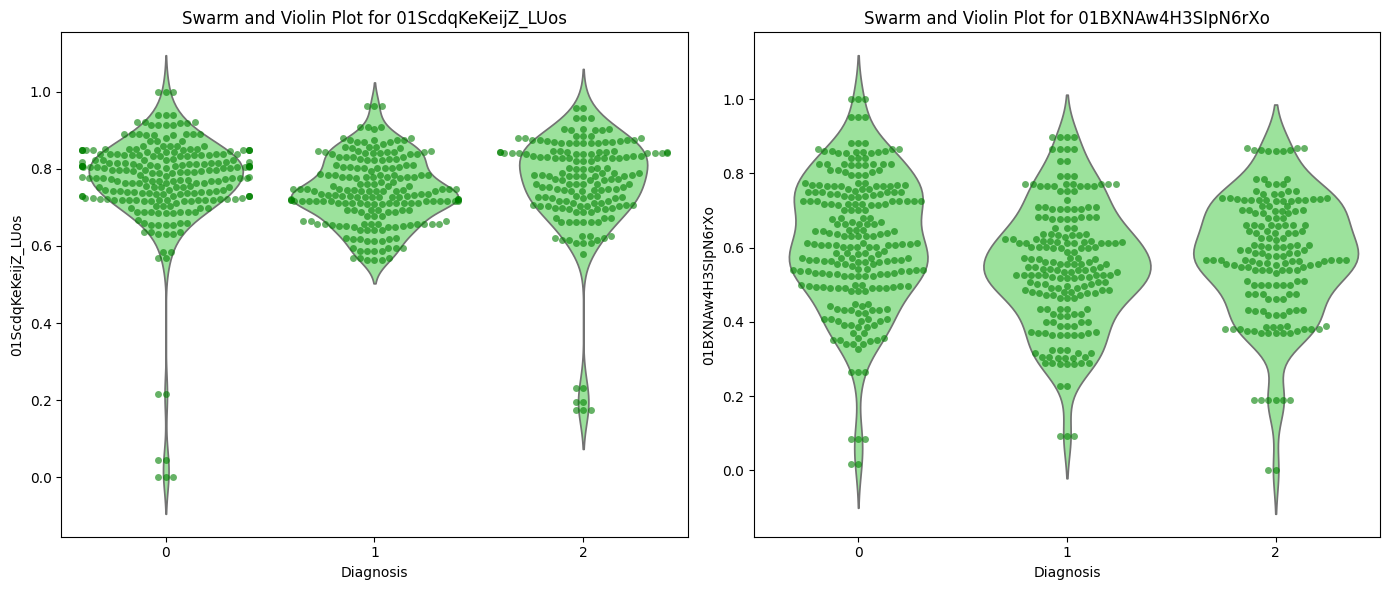

In [86]:
pc_columns = ['Diagnosis', '01ScdqKeKeijZ_LUos', '01BXNAw4H3SIpN6rXo']

# Creating Swarm and Violin plots for PC1 and PC2 against Diagnosis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.swarmplot(x='Diagnosis', y='01ScdqKeKeijZ_LUos', data=data[pc_columns], ax=axes[0], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='01ScdqKeKeijZ_LUos', data=data[pc_columns], ax=axes[0], inner=None, color='lightgreen')

sns.swarmplot(x='Diagnosis', y='01BXNAw4H3SIpN6rXo', data=data[pc_columns], ax=axes[1], color='green', alpha=0.6)
sns.violinplot(x='Diagnosis', y='01BXNAw4H3SIpN6rXo', data=data[pc_columns], ax=axes[1], inner=None, color='lightgreen')

axes[0].set_title('Swarm and Violin Plot for 01ScdqKeKeijZ_LUos')
axes[1].set_title('Swarm and Violin Plot for 01BXNAw4H3SIpN6rXo')

plt.tight_layout()
plt.show()

#### Correlation Map

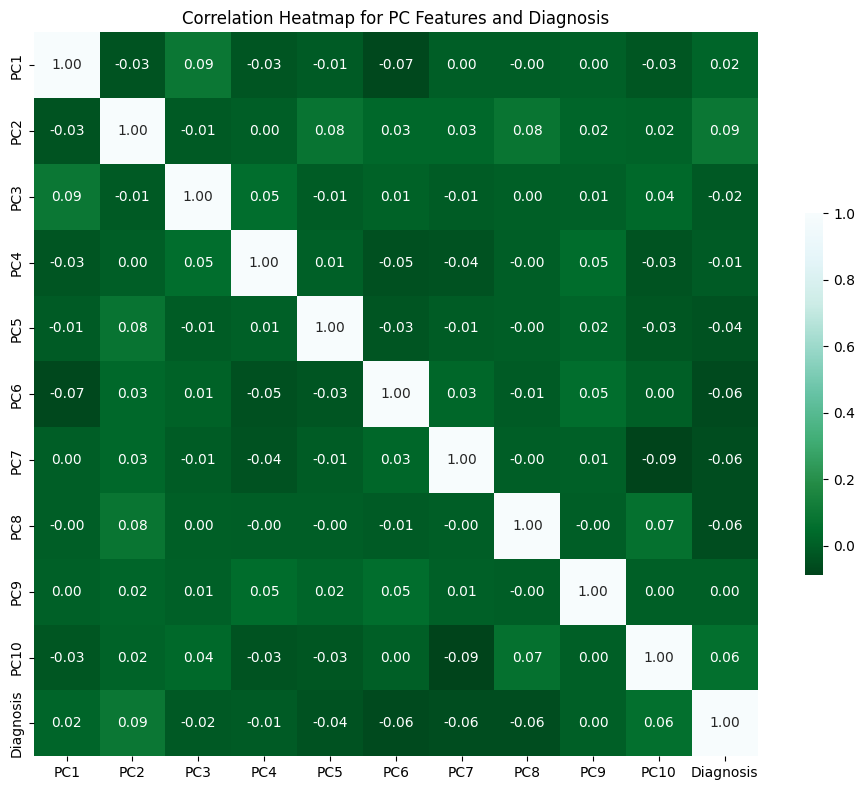

In [87]:
# Now, let's prepare a Correlation plot for all PC features and Diagnosis
# Selecting all columns that start with 'PC' and include 'Diagnosis'
pc_all_columns = [col for col in data.columns if col.startswith('PC')] + ['Diagnosis']
pc_data = data[pc_all_columns]

# Calculating the correlation matrix
corr_matrix = pc_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuGn_r', cbar_kws={'shrink': .5}, square=True)
plt.title('Correlation Heatmap for PC Features and Diagnosis')
plt.tight_layout()
plt.show()

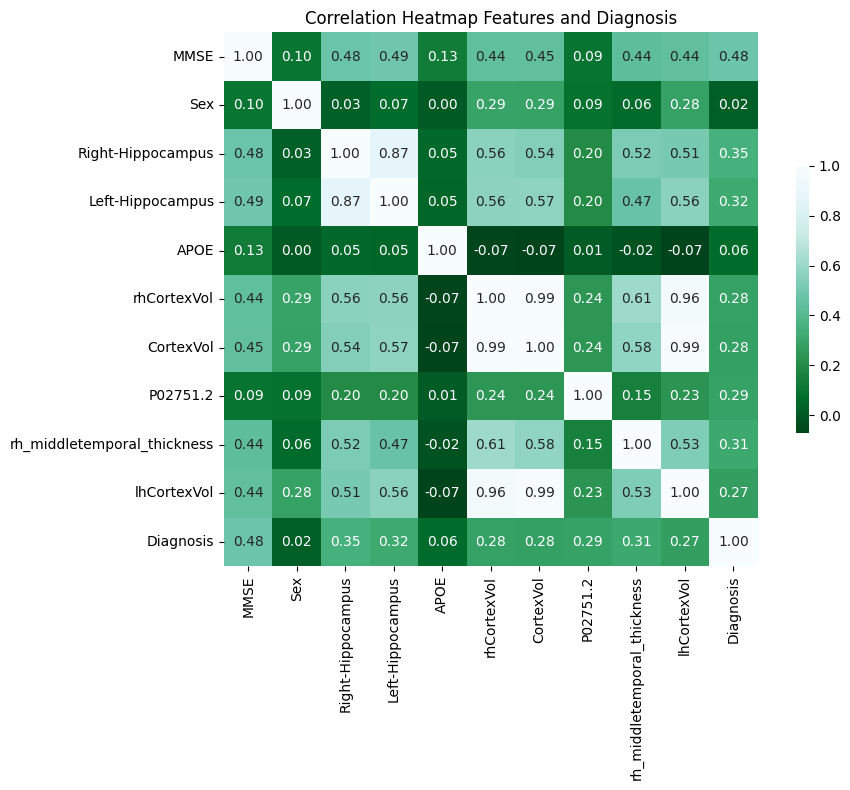

In [88]:
cols = ['MMSE', 'Sex','Right-Hippocampus', 'Left-Hippocampus','APOE', 'rhCortexVol', 'CortexVol', 'P02751.2', 'rh_middletemporal_thickness', 'lhCortexVol', 'Diagnosis']
pc_data = data[cols]

# Calculating the correlation matrix
corr_matrix = pc_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuGn_r', cbar_kws={'shrink': .5}, square=True)
plt.title('Correlation Heatmap Features and Diagnosis')
plt.tight_layout()
plt.show()

#### Feature Importance

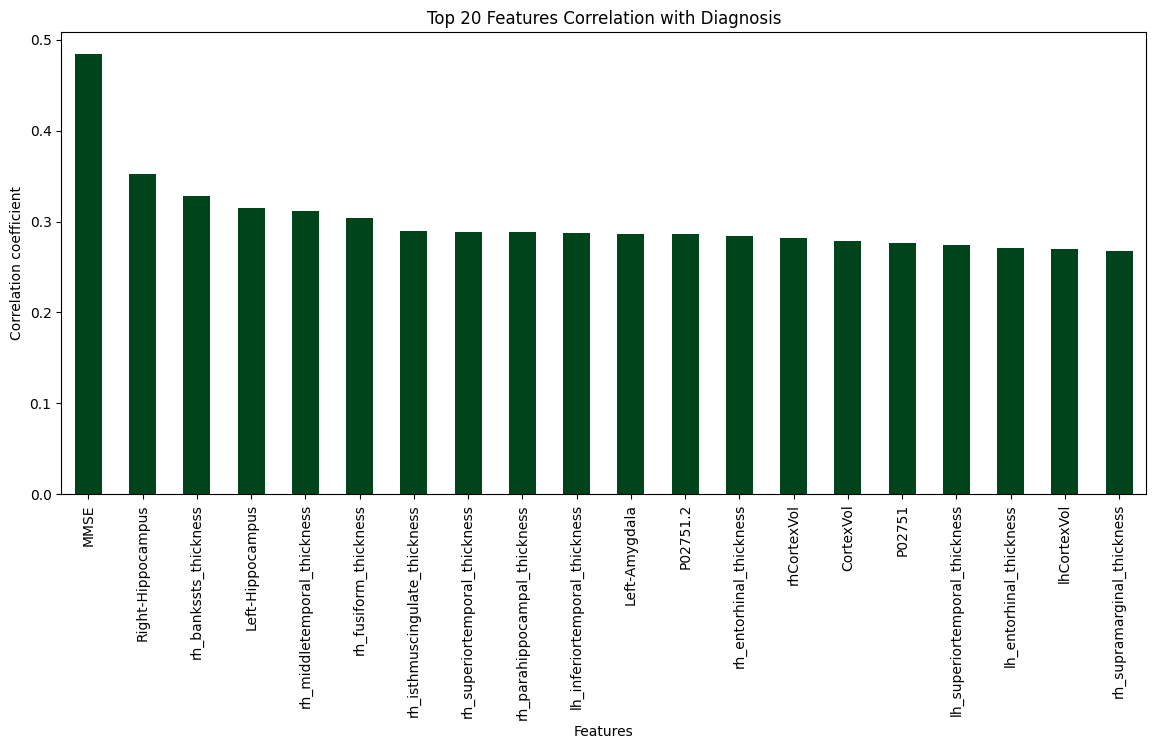

In [89]:
numeric_features = data.select_dtypes(include=[np.number])

# We also need to remove any potential infinity or NaN values as these will cause errors during feature selection.
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
# Calculate the correlation of each feature with the target variable 'Diagnosis'
correlations = numeric_features.corrwith(numeric_features['Diagnosis']).sort_values(ascending=False)

# Remove the 'Diagnosis' correlation with itself
correlations = correlations.drop('Diagnosis', axis=0)

# Selecting top features based on correlation (we can choose a threshold or top N features)
# For this example, let's select the top 20 features
top_features_by_correlation = correlations.head(20)

# Now let's visualize these top features with their correlation values
top_features_by_correlation.plot(kind='bar', figsize=(14, 6), colormap='BuGn_r')
plt.title('Top 20 Features Correlation with Diagnosis')
plt.ylabel('Correlation coefficient')
plt.xlabel('Features')
plt.show()


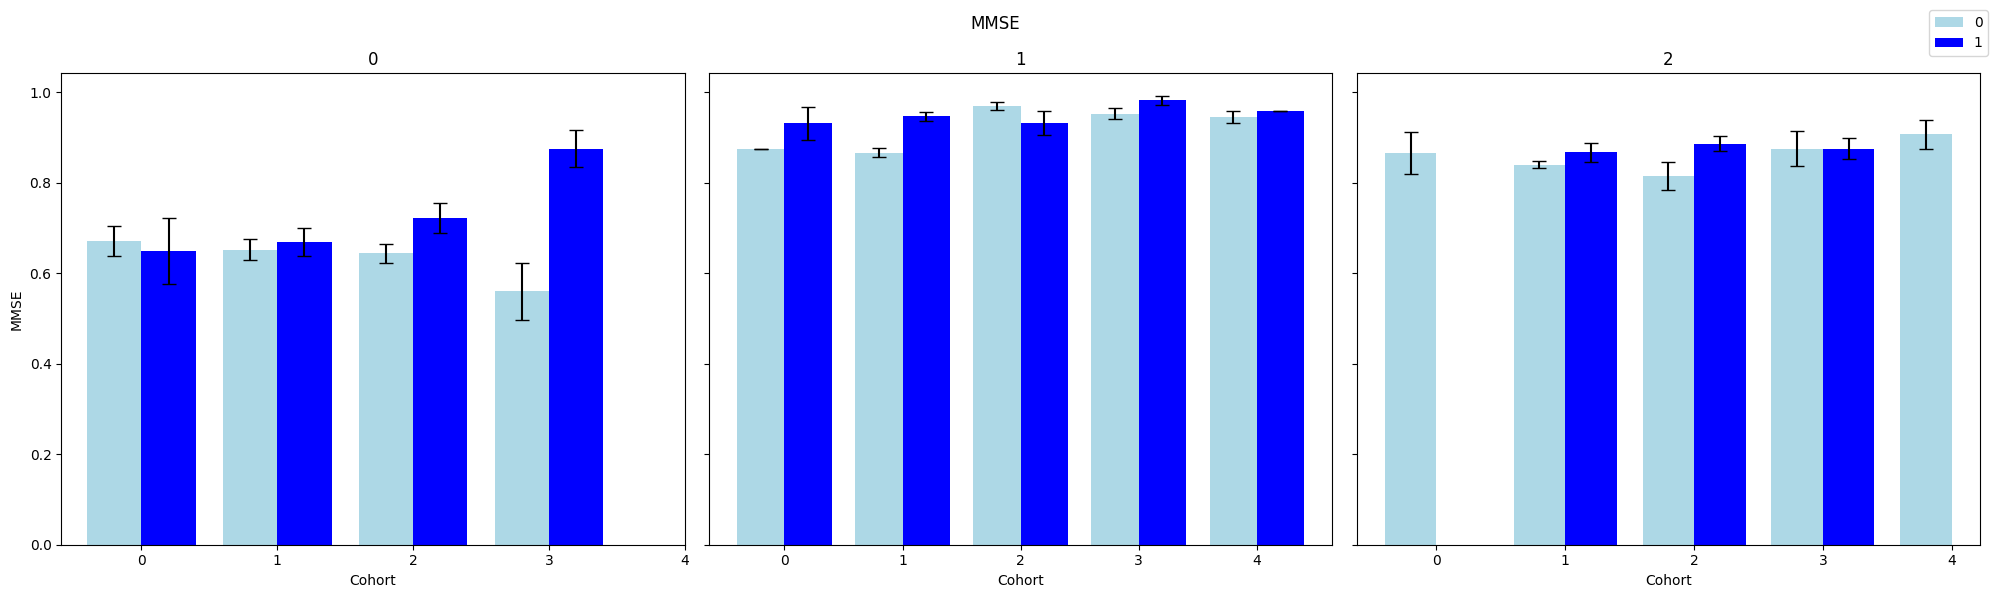

In [93]:
import matplotlib.pyplot as plt

# Unique identifiers for each category
stages = data['Diagnosis'].unique()
cohorts = data['APOE'].unique()
assignments = data['Sex'].unique()
metric = 'MMSE'

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, len(stages), figsize=(20, 6), sharey=True)

# Colors for the assignments
colors = ['lightblue', 'blue']

# Create the plots for each stage, including error bars for standard deviation
for i, stage in enumerate(stages):
    ax = axes[i]
    
    # Data for this stage
    stage_data = data[data['Diagnosis'] == stage]
    
    # Variables to track the position of bars for each cohort
    cohort_positions = np.arange(len(cohorts))
    
    # Plot data for each cohort and assignment
    for j, cohort in enumerate(cohorts):
        for k, assignment in enumerate(assignments):
            # Filter data for this combination of stage, cohort, and assignment
            subset = stage_data[(stage_data['APOE'] == cohort) & (stage_data['Sex'] == assignment)]
            # Mean accuracy for this cohort and assignment at the current stage
            mean_accuracy = subset[metric].mean()
            std_error = subset['MMSE'].std() / np.sqrt(len(subset))  # Standard error
            # Determine position for the bar
            bar_position = cohort_positions[j] - 0.2 + k * 0.4
            # Plot the bar
            ax.bar(bar_position, mean_accuracy, yerr=std_error, capsize=5, width=0.4, color=colors[k], label=f'{assignment}' if (i == j == 0) else "")
    
    # Set the labels and titles
    ax.set_xticks(cohort_positions)
    ax.set_xticklabels(cohorts)
    ax.set_title(stage)
    ax.set_xlabel('Cohort')
    if i == 0:
        ax.set_ylabel(metric)

# Add a legend outside the last subplot
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1, 1))
fig.suptitle(metric)

plt.tight_layout()
plt.show()